#  FORD BIKE SHARING DATA ANALYSIS
## by OLAJIDE  BUHARI

## Table of Content
- ### [Introduction](#i)
- ### [Preliminary Wrangling](#pw)
- ### [Data Cleaning steps](#dcs)
- ### [Feature Engineering](#fe)
- ### [Univariate Exploration](#ue)
- ### [Bivariate exploration](#be)
- ### [Multivariate exploration](#me)
- ### [Conclusions](#c)

## Introduction  <a class="anchor" id="i"></a>
> This analysis is carried out on the ford bike sharing trip data with over 183,000 entries 



## Preliminary Wrangling <a class="anchor" id="pw"></a>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
152055,276,2019-02-06 16:36:36.2450,2019-02-06 16:41:12.9640,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,16.0,Steuart St at Market St,37.794130,-122.394430,5221,Subscriber,1985.0,Male,No
101325,693,2019-02-14 17:34:17.9160,2019-02-14 17:45:51.6820,232.0,MLK Jr Way at 14th St,37.806163,-122.276040,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,3464,Subscriber,1974.0,Female,No
24403,2161,2019-02-25 17:50:50.1200,2019-02-25 18:26:51.2110,25.0,Howard St at 2nd St,37.787522,-122.397405,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,6492,Subscriber,1988.0,Male,No
67786,622,2019-02-20 07:27:03.9570,2019-02-20 07:37:26.2640,19.0,Post St at Kearny St,37.788975,-122.403452,88.0,11th St at Bryant St,37.770030,-122.411726,4432,Subscriber,1980.0,Other,Yes
138681,429,2019-02-08 06:49:31.2900,2019-02-08 06:56:40.5210,144.0,Precita Park,37.747300,-122.411403,108.0,16th St Mission BART,37.764710,-122.419957,4996,Subscriber,1983.0,Female,No


In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

- Data is made up of 16 columns and 183412 rows
- there are missing data in some columns
- The longitude and latitude details of the locations are not aspect of interest in this analysis
- some columns are of wrong data type (start_time, end_time, start_station_id, end_station_id, bike_id)

In [6]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

##### Columns with missing data and number of missing entries
- start_station_id            197
- start_station_name          197
- end_station_id              197
- end_station_name            197
- member_birth_year          8265
- member_gender              8265

## Data cleaning steps <a class="anchor" id="dcs"></a>
1. Convert Columns to apropriate Data types
2. Drop rows with missing data in start_station_id, start_station_name, end_station_id, end_station_name
3. Drop columns that holds location precision

##### 1.  Convert Columns to apropriate Data types

In [7]:
df['start_time'] = pd.to_datetime(df['start_time']) #converts to datetime
df['end_time'] = pd.to_datetime(df['end_time']) #converts to datetime
df['start_station_id'] = df['start_station_id'].astype('object') #coverts to object datatype
df['end_station_id'] = df['end_station_id'].astype('object') #coverts to object datatype
df['bike_id'] = df['bike_id'].astype('object') #coverts to object datatype

In [8]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

#### 2. Drop rows with missing data in start_station_id, start_station_name, end_station_id, end_station_name

In [9]:
df.dropna(subset=['start_station_id'], inplace=True)

In [10]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8263
member_gender              8263
bike_share_for_all_trip       0
dtype: int64

The missing Data in member_birth_year and member_gender would be attended to when analyzing those columns beacuse dropping it now would lead to substantial loss of data in other columns that would be valuable for this analysis

#### 3. Drop columns that holds location precision

In [11]:
df.drop(columns=['start_station_latitude','end_station_latitude','start_station_longitude',
                'end_station_longitude'], axis=1, inplace=True)

In [12]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip'],
      dtype='object')

In [13]:
df.shape

(183215, 12)

In [14]:
df.reset_index(drop= True, inplace= True)

In [15]:
df_copy= df.copy()

### What is the structure of your dataset?

> There are 183215 trip entries with 16 features in the original data. After cleaning, we arae left with 183215 rows and 12 columns. each rows hold information about the trip duration, locations pertaining to the trip, the bike used, and information about the rider.

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in the demography of riders that use this service the most

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> The rider birth year, gender, user type would play a vital role in grouping the riders demography

## Feature Engineering <a class="anchor" id="fe"></a>

In [16]:
df_copy['duration_mins'] = df_copy['duration_sec'] / 60

#creates a new column with duration converted from seconds to hours
df_copy['duration_hour'] = df_copy['duration_sec'] / 3600 

#create an age column by subtracting birth year from the year the data was collected
df_copy['age'] = 2019 - df_copy['member_birth_year']

#create a column  
df_copy['start_day'] = df_copy['start_time'].dt.day_name()

In [17]:
bins = [17, 25, 35, 65,142] 
labels = ["young", "young_adult", "adult","elderly"]

#creates a column of age classes
df_copy['age_group'] = pd.cut(df_copy['age'],  bins=bins, labels=labels) 

#Creates column of the hour of the day
df_copy['start_hour'] = df_copy['start_time'].dt.hour 
df_copy['end_hour'] = df_copy['end_time'].dt.hour

In [18]:
df_copy.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip', 'duration_mins', 'duration_hour', 'age',
       'start_day', 'age_group', 'start_hour', 'end_hour'],
      dtype='object')

In [19]:
df_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_mins,duration_hour,age,start_day,age_group,start_hour,end_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,869.750000,14.495833,35.0,Thursday,young_adult,17,8
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,No,708.683333,11.811389,NaN,Thursday,NaN,18,6
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,1030.900000,17.181667,47.0,Thursday,adult,12,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,608.166667,10.136111,30.0,Thursday,young_adult,17,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,26.416667,0.440278,45.0,Thursday,adult,23,0


## Univariate Exploration <a class="anchor" id="ue"></a>

In [20]:
df_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_mins,duration_hour,age,start_day,age_group,start_hour,end_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,869.750000,14.495833,35.0,Thursday,young_adult,17,8
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,No,708.683333,11.811389,NaN,Thursday,NaN,18,6
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,1030.900000,17.181667,47.0,Thursday,adult,12,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,608.166667,10.136111,30.0,Thursday,young_adult,17,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,26.416667,0.440278,45.0,Thursday,adult,23,0


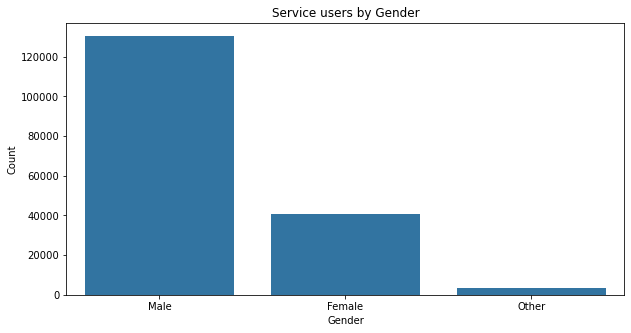

In [21]:
plt.figure(figsize=(10,5))
plt.title('Service users by Gender')
sns.countplot(data=df_copy, x='member_gender',order=['Male','Female','Other'], color= sns.color_palette()[0])
plt.xlabel("Gender")
plt.ylabel('Count');

Males use this service more than any other gender

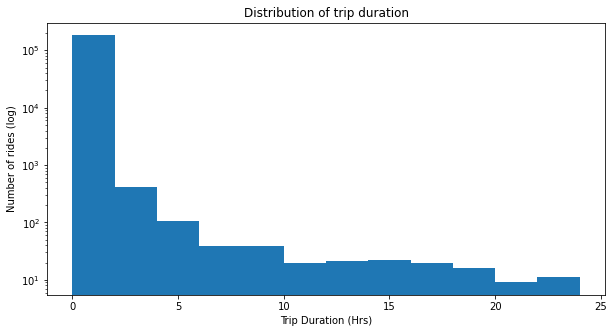

In [22]:
plt.figure(figsize=(10,5))
plt.title('Distribution of trip duration')
plot_bins = np.arange(0,25,2)
plt.hist(data=df_copy, x="duration_hour", bins=plot_bins)
plt.yscale('log') 
plt.xlabel('Trip Duration (Hrs)')
plt.ylabel('Number of rides (log)')
plt.yticks([10**1, 10**2, 10**3, 10**4, 10**5]);

Most of the trips taken by riders are under 5 hours from starts to stop. Majority being between 0 to 2 hrs

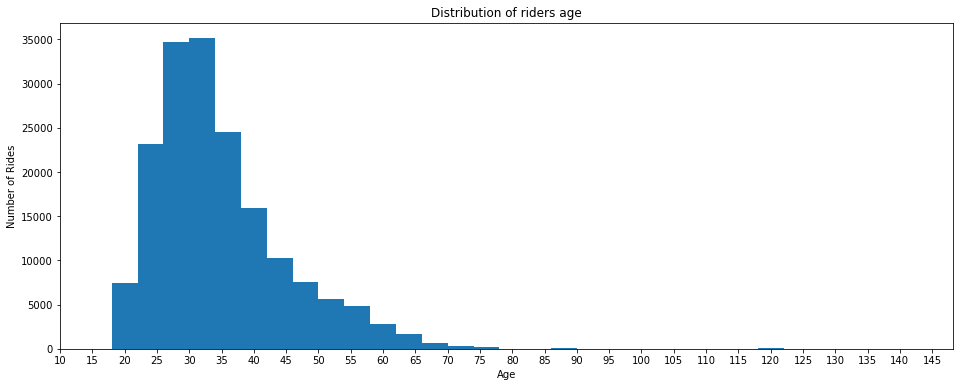

In [23]:
plt.figure(figsize=(16,6))
plt.title('Distribution of riders age')
plt.hist(data=df_copy, x='age', bins=np.arange(18,141+5, 4), color=sns.color_palette()[0])
plt.xticks(np.arange(10,150,5))
plt.xlabel('Age')
plt.ylabel('Number of Rides');

The Data distribution is right Skewed. From 35 yrs upward there is decline in the number of users as age increases.

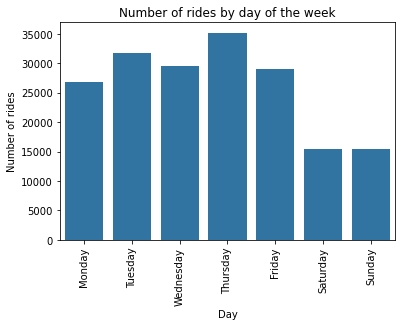

In [45]:
ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df_copy, x='start_day', color=sns.color_palette()[0], order=ordered)
plt.title('Number of rides by day of the week')
plt.xticks(rotation=90)
plt.xlabel('Day')
plt.ylabel('Number of rides'); 

There are higher number of users on work days than weekends

In [25]:
x = df_copy.user_type.value_counts()
print(x)

Subscriber    163414
Customer       19801
Name: user_type, dtype: int64


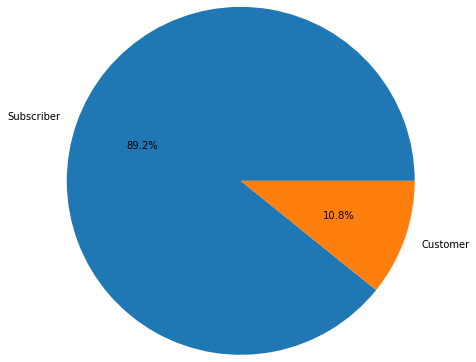

In [26]:
plt.pie(x, labels=['Subscriber', 'Customer'], radius=2, autopct='%1.1f%%');

Majority of the trips(about 89%) are are made by riders that are suscribed to this service

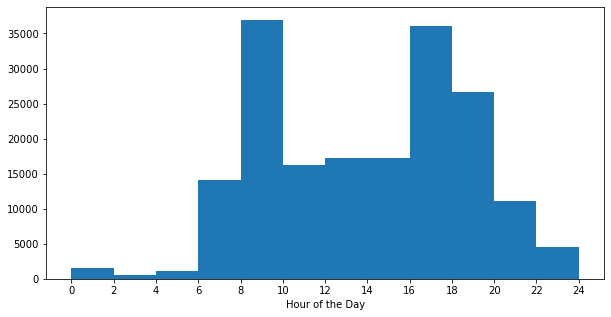

In [27]:
plt.figure(figsize=(10,5))
plt.xlabel('Hour of the Day')
plt.hist(data=df_copy, x='start_hour', bins=np.arange(0,26,2))
plt.xticks(np.arange(0,26,2));

- The data distribution is bi-modal. The two peaks are around the start and end of business time of the day.
- The service gets least patronage between midnight to around 6 am

###  What are the observations from the Univariate Exploration?
- Males use this service more than any other gender
- Most of the trips taken by riders are under 5 hours from starts to stop. Majority being between 0 to 2 hrs
- From 35 yrs upward there is decline in the number of users as age increases
- There are higher number of users on weekdays than weekends
- Majority of the trips(about 89%) are are made by riders that are suscribed to this service
- The service gets least patronage between midnight to around 6 am

## Bivariate Exploration <a class="anchor" id="be"></a>

In [28]:
def plot_top_values ( data , col1 ,col2 , top=True):
    dframe = data.groupby(col1).sum()[col2].reset_index()
    if top == True:
        return (sns.barplot(data= dframe.sort_values(by = col2, ascending=False).head(10),
                            x=col1, y=col2, color = sns.color_palette()[0]))
    elif top == False:
        return (sns.barplot(data=dframe.sort_values(by = col2, ascending=True).head(10),
                       x=col1, y=col2, color = sns.color_palette()[0]))
    else:
        raise Exception ('keyword arg only takes bool value')
        
                    
        

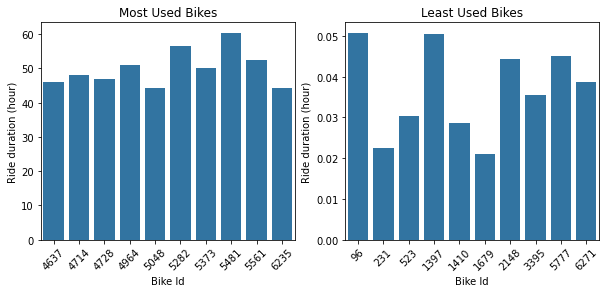

In [29]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.title('Most Used Bikes')
plot_top_values(df_copy, 'bike_id', 'duration_hour', top= True)
plt.xlabel('Bike Id')
plt.ylabel('Ride duration (hour)')
plt.xticks(rotation=45);

plt.subplot(1, 2, 2)
plt.title('Least Used Bikes')
plot_top_values(df_copy, 'bike_id', 'duration_hour', top= False)
plt.xlabel('Bike Id')
plt.ylabel('Ride duration (hour)')
plt.xticks(rotation=45);

- 5481 is the most used bike
- 1679 is the least used bike

In [30]:
user_df= df_copy.groupby('user_type').mean()['duration_mins'].reset_index()
user_df

,user_type,duration_mins
0,Customer,23.891262
1,Subscriber,10.669413


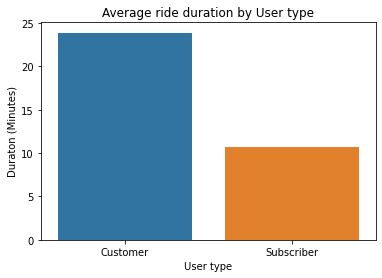

In [31]:
plt.title("Average ride duration by User type")
sns.barplot(data=user_df, x='user_type', y='duration_mins')
plt.xlabel('User type')
plt.ylabel('Duraton (Minutes)');

Customers that are not subcribed to the service take longer rides than subscribed riders

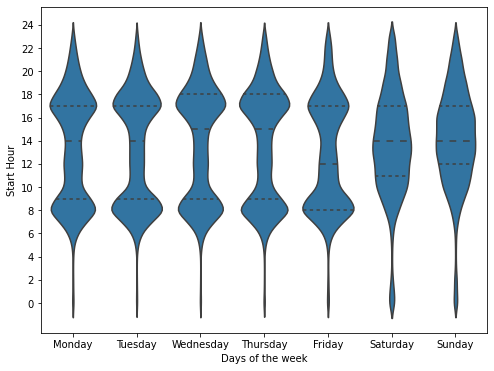

In [44]:
hour = np.arange(0,26,2)
plt.figure(figsize=(8,6))
sns.violinplot(data=df_copy, x='start_day', y='start_hour',
               order=ordered, color= sns.color_palette()[0], inner='quartile')
plt.xlabel('Days of the week')
plt.ylabel('Start Hour')
plt.yticks(hour);

One significant insight from the violin plot is the level of patronage this service gets during work hours on week days. There is low patronage during the working hours on weekdays compared to high patronage on weekends around the same hour of the day.
- The service is used more before 9am (start of work) and after 5pm on weekdends

In [33]:
user_df= df_copy.groupby('member_gender').mean()['duration_mins'].reset_index()
user_df

,member_gender,duration_mins
0,Female,12.981213
1,Male,11.206581
2,Other,16.622141


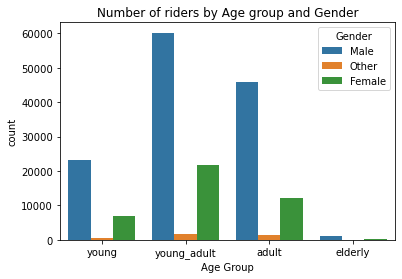

In [34]:
plt.title('Number of riders by Age group and Gender')
sns.countplot(data=df_copy , x= 'age_group', hue='member_gender')
plt.xlabel("Age Group");
plt.legend(title="Gender");

The riders are mostly Young male Adults

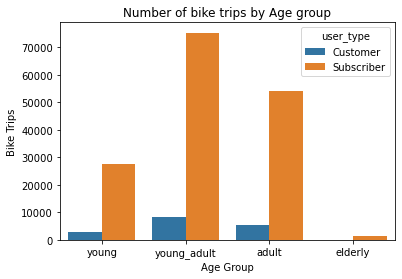

In [35]:
plt.title("Number of bike trips by Age group")
sns.countplot(data=df_copy , x= 'age_group', hue='user_type') 
plt.xlabel('Age Group')
plt.ylabel('Bike Trips');

Young adult subscribers takes the most rides

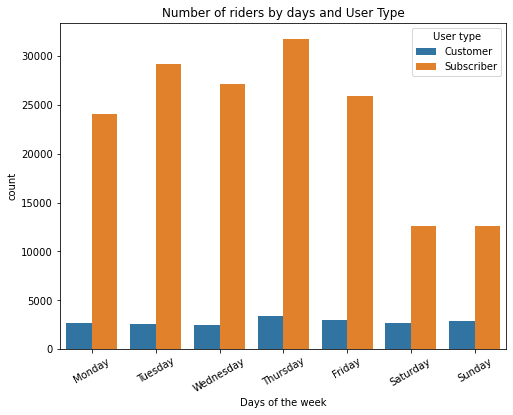

In [36]:
plt.figure(figsize=(8,6))
plt.title("Number of riders by days and User Type")
sns.countplot(data=df_copy , x= 'start_day', hue='user_type', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                                                                     'Friday', 'Saturday', 'Sunday'])
plt.xticks(rotation=30)
plt.xlabel('Days of the week')
plt.legend(title="User type"); 

There is a significant drop in the number of customer riders on saturday and sunday, compared to every other day of the week.

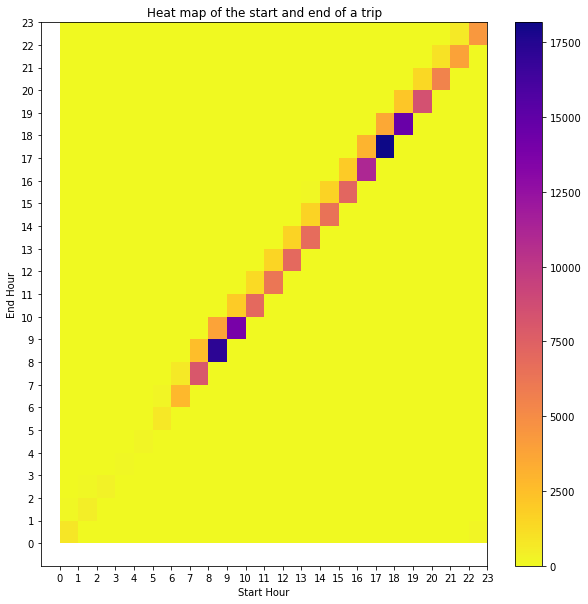

In [37]:
plt.figure(figsize=(10,10))
plt.title('Heat map of the start and end of a trip')
plt.hist2d(data=df_copy, x='start_hour', y='end_hour', bins =np.arange(0,24),  cmap="plasma_r")
plt.colorbar()
plt.xticks(np.arange(0,24))
plt.yticks(np.arange(0,24)) 
plt.xlabel('Start Hour')
plt.ylabel('End Hour')
plt.xlim(-1)
plt.ylim(-1);

Most trips ends between one to two hours from the start time.

### What are the observations from the Bi-Variate exploration?
- Customers that are not subcribed to the service take longer rides than subscribed riders 
- There is low patronage during the working hours on weekdays compared to high patronage on weekends around the same hour of the day.
- The service is used more before 9am (start of work) and after 5pm on weekdends
- The riders are mostly Young male Adults
- There is a significant drop in the number of customer riders on saturday and sunday, compared to every other day of the week


## Multivariate Exploration <a class="anchor" id="me"></a>

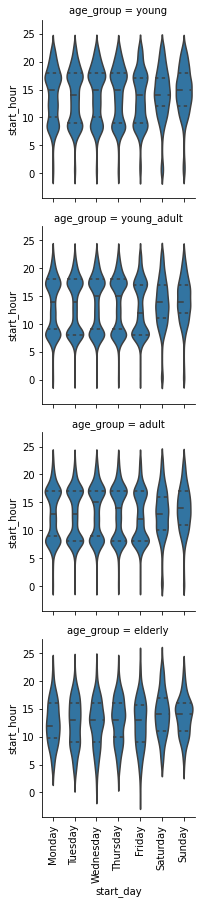

In [38]:
g= sns.FacetGrid(data=df_copy, col= 'age_group', col_wrap=1 )
g.map(sns.violinplot, 'start_day', 'start_hour', inner='quartile', order=ordered)
plt.xticks(rotation=90);

- The data distribution in the above violin plot takes the same pattern for most of the age groups excepts the elderly. 
The plot indicates a rise in bike rides around 8am to 9 am and 4pm to 5pm on weekdays, while on weekends , 
riding activities span longer from around 9am to 6pm.
- On the contrary, the riding activities of the elderly takes a different pattern. The rise in their riding activity starts earlier around 6 am and starts declining 6pm on weekdays. This pattern becomes shorter on weekends with bike riding seeeing a rise betweeen 8 am to 4pm.

In [39]:
#Creates a column that shows if a day is weekday or weekend
wkday = ['Thursday', 'Wednesday', 'Tuesday', 'Monday','Friday']
wkend = [ 'Sunday', 'Saturday']
lis = []
for i in df_copy['start_day']:
    if i in wkday:
        lis.append('weekday')
    elif i in wkend:
        lis.append('weekend')
    else:
        print(' unknown entry at')
        
df_copy['wkday_wkend'] = lis

In [40]:
v = df_copy.groupby(['age_group','wkday_wkend']).mean()['duration_mins'].reset_index(name="duration_mean")

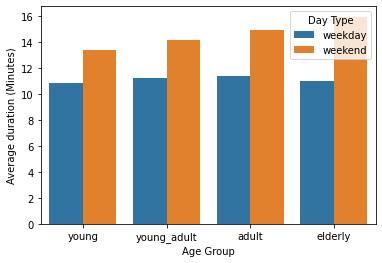

In [41]:
sns.barplot(data=v, x ='age_group', y="duration_mean", hue= 'wkday_wkend')
plt.xlabel('Age Group')
plt.legend(title='Day Type')
plt.ylabel('Average duration (Minutes)');

All age group rides longer on weekends than weekdays

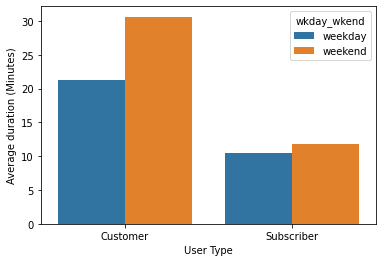

In [42]:
v = df_copy.groupby(['user_type','wkday_wkend']).mean()['duration_mins'].reset_index(name="duration_mean")
sns.barplot(data=v, x ='user_type', y="duration_mean", hue= 'wkday_wkend')
plt.xlabel('User Type')
plt.ylabel('Average duration (Minutes)'); 

Both users ride longer on weekends than weekdays. while there is a significant change on the average trip duration of Customers between weekend and weekday (about 10 minutes), there is just a slight increase in trip duration for the Subscribers on weekends which is about 2minutes

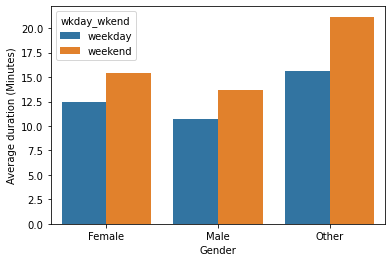

In [43]:
v = df_copy.groupby(['member_gender','wkday_wkend']).mean()['duration_mins'].reset_index(name="duration_mean")
sns.barplot(data=v, x ='member_gender', y="duration_mean", hue= 'wkday_wkend')
plt.xlabel('Gender')
plt.ylabel('Average duration (Minutes)');  

### What are the observations from the Multivariate exploration?
- The data distribution in the   violin plot takes the same pattern for most of the age groups excepts the elderly. 
The plot siginifies a rise in bike rides around 8am to 9 am and 4pm to 5pm on weekdays, while on weekends , 
riding activities span longer from around 9am to 6pm.
- On the contrary, the riding activities of the elderly takes a different pattern. The rise in their riding activity starts earlier around 6 am and starts declining around 6pm on weekdays. This pattern becomes shorter on weekends with bike rides recording a rise betweeen 8 am to 4pm.

## Conclusions
> The original information provided in the data were inadequate to carry out the desired exploration. To mitigate the aforementioned limitation, i carried out feature engineering on some of the default columns to generate new features. Most of the newly generated features were derived from the 'start_time' column which was broken down to days of the week,  hour of the day, day type (week day or weekend). Other features that were created are , duration in minute and duration in hour from the 'duration_sec' column  and lastly, age was generated from member_birth_year.

> The bike sharing service enjoyed varying level of patronage from diverse group of riders. One of the the Most notable finding in this analysis is the time around which this service peaks. Most Rides start_time is around 8am (before work hour hour) and around 5pm (after work hour) on weekdays usually, most of these rides end between 0 to 1 hour from the 'start time'. However, on weekends, the service peaks across so many hours of the day, between 9am to 9pm

> Another interesting insight is the age distribution. The least users of this service are the elderly whose pattern of usage also indicates no significant difference between their weekday and weekend use.

> In summary;
- The service is majorly used as a means of transportation to work and from work on week days
- Women rides longer on average than men but less than other gender
- People ride more on weekdays than weekends but take longer rides on weekend than weekday
- The bike sharing service enjoys it's best patronage from subcribers, mostly the Male Young-Adults(ages 25 to 35)